In [ ]:
#installing the dependencies

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [ ]:
#loading the stock data
from google.colab import files
uploaded = files.upload()

Saving NFLX.csv to NFLX.csv


In [ ]:
 #loading the data into data frame

 df = pd.read_csv('NFLX.csv')
 df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-07-13,567.979980,575.369995,520.960022,525.500000,525.500000,18399000
1,2020-07-14,517.080017,525.500000,490.489990,524.880005,524.880005,15083300
2,2020-07-15,516.299988,529.000000,510.179993,523.260010,523.260010,10066700
3,2020-07-16,526.479980,535.539978,504.359985,527.390015,527.390015,24499000
4,2020-07-17,494.869995,503.589996,484.140015,492.989990,492.989990,24991400
...,...,...,...,...,...,...,...
246,2021-07-02,535.500000,538.539978,529.390015,533.979980,533.979980,1975500
247,2021-07-06,533.000000,542.859985,533.000000,541.640015,541.640015,2775100
248,2021-07-07,544.239990,544.640015,531.659973,535.960022,535.960022,2722500
249,2021-07-08,530.929993,535.500000,529.090027,530.760010,530.760010,3269000


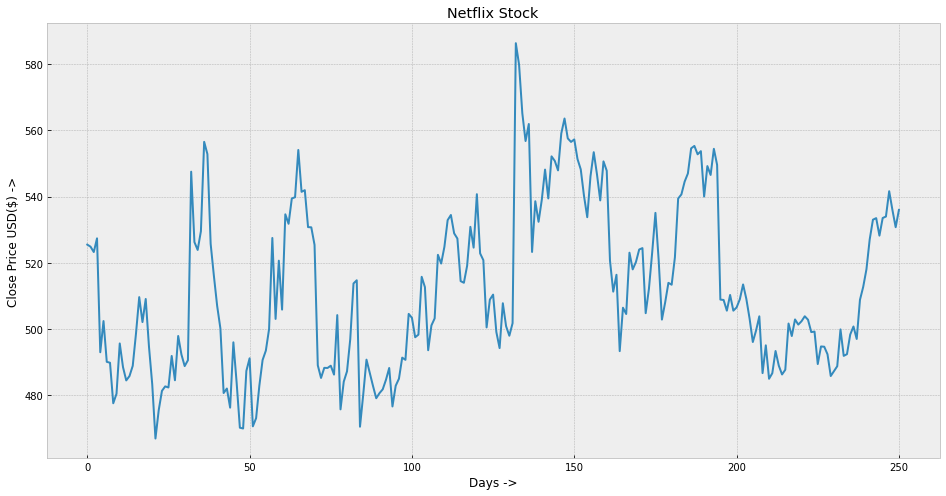

In [ ]:
#visualize the close price with matplotlib
plt.figure(figsize=(16,8))
plt.title('Netflix Stock')
plt.xlabel('Days ->')
plt.ylabel('Close Price USD($) ->')
plt.plot(df['Close'])
plt.show()



In [ ]:
#get only the close price
df = df[['Close']]
df.head(4)

,Close
0,525.500000
1,524.880005
2,523.260010
3,527.390015


In [ ]:
#creating a variable to predict 'x' days into the future
future_days = 25
#creating a new column (target) shifted 'x' units/days up
df['Prediction'] = df[['Close']].shift(-future_days)
#it's just repeatation to see it
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Close,Prediction
0,525.500000,482.350006
1,524.880005,491.869995
2,523.260010,484.529999
3,527.390015,497.899994
4,492.989990,492.309998
...,...,...
246,533.979980,NaN
247,541.640015,NaN
248,535.960022,NaN
249,530.760010,NaN


In [ ]:
#as last 'x' days will be NaN, so
#we will create the feature data set (X) and convert it to a numpy array and remove the last 'x' rows/days

X = np.array(df.drop(['Prediction'], 1))[:-future_days]

print(X)

[[525.5     ]
 [524.880005]
 [523.26001 ]
 [527.390015]
 [492.98999 ]
 [502.410004]
 [490.100006]
 [489.820007]
 [477.579987]
 [480.450012]
 [495.649994]
 [488.51001 ]
 [484.480011]
 [485.799988]
 [488.880005]
 [498.619995]
 [509.640015]
 [502.109985]
 [509.079987]
 [494.730011]
 [483.380005]
 [466.929993]
 [475.470001]
 [481.329987]
 [482.679993]
 [482.350006]
 [491.869995]
 [484.529999]
 [497.899994]
 [492.309998]
 [488.809998]
 [490.579987]
 [547.530029]
 [526.27002 ]
 [523.890015]
 [529.559998]
 [556.549988]
 [552.840027]
 [525.75    ]
 [516.049988]
 [507.019989]
 [500.190002]
 [480.670013]
 [482.029999]
 [476.26001 ]
 [495.98999 ]
 [483.859985]
 [470.200012]
 [469.959991]
 [487.350006]
 [491.170013]
 [470.609985]
 [473.079987]
 [482.880005]
 [490.649994]
 [493.480011]
 [500.029999]
 [527.51001 ]
 [503.059998]
 [520.650024]
 [505.869995]
 [534.659973]
 [531.789978]
 [539.440002]
 [539.809998]
 [554.090027]
 [541.450012]
 [541.940002]
 [530.789978]
 [530.719971]
 [525.419983]
 [489.

In [ ]:
df

,Close,Prediction
0,525.500000,482.350006
1,524.880005,491.869995
2,523.260010,484.529999
3,527.390015,497.899994
4,492.989990,492.309998
...,...,...
246,533.979980,NaN
247,541.640015,NaN
248,535.960022,NaN
249,530.760010,NaN


In [ ]:
#creating a target data set (y) and convert it to a numpy array and get all of the target values except the ;ast 'x' rows/days

y = np.array(df['Prediction'])[:-future_days]
print(y)

[482.350006 491.869995 484.529999 497.899994 492.309998 488.809998
 490.579987 547.530029 526.27002  523.890015 529.559998 556.549988
 552.840027 525.75     516.049988 507.019989 500.190002 480.670013
 482.029999 476.26001  495.98999  483.859985 470.200012 469.959991
 487.350006 491.170013 470.609985 473.079987 482.880005 490.649994
 493.480011 500.029999 527.51001  503.059998 520.650024 505.869995
 534.659973 531.789978 539.440002 539.809998 554.090027 541.450012
 541.940002 530.789978 530.719971 525.419983 489.049988 485.230011
 488.279999 488.23999  488.929993 486.23999  504.209991 475.73999
 484.119995 487.220001 496.950012 513.76001  514.72998  470.5
 480.23999  490.76001  486.769989 482.839996 479.100006 480.630005
 481.790009 484.670013 488.23999  476.619995 482.880005 485.
 491.359985 490.700012 504.579987 503.380005 497.519989 498.309998
 515.780029 512.659973 493.600006 501.089996 503.220001 522.419983
 519.780029 524.830017 532.900024 534.450012 528.909973 527.330017
 514.47

In [ ]:
#split the data into 75% training and 25% testing

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
#creating the machine learning models
#creating the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)

#creating the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [ ]:
 #Get the last 'x' rows of the feature data set
 x_future = df.drop(['Prediction'], 1)[:-future_days]
 x_future = x_future.tail(future_days)
 x_future = np.array(x_future)
 x_future

array([[509.      ],
       [513.469971],
       [509.109985],
       [503.179993],
       [496.079987],
       [499.549988],
       [503.839996],
       [486.690002],
       [495.079987],
       [484.980011],
       [486.660004],
       [493.369995],
       [488.940002],
       [486.279999],
       [487.700012],
       [501.670013],
       [497.890015],
       [502.899994],
       [501.339996],
       [502.359985],
       [503.859985],
       [502.809998],
       [499.079987],
       [499.23999 ],
       [489.429993]])

In [ ]:
#Show the decision tree model prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
print()
#Show the linear regression model prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)
print()
print()


[494.73999  494.660004 492.390015 514.72998  529.559998 488.769989
 499.890015 491.899994 492.410004 522.859985 500.769989 497.
 508.820007 512.73999  518.059998 527.070007 533.030029 533.5
 528.210022 488.809998 499.890015 541.640015 535.960022 530.76001
 535.97998 ]


[512.57543185 512.73717938 512.5794117  512.36483277 512.10791646
 512.23347971 512.38871522 511.76813642 512.0717311  511.70625978
 511.76705094 512.00985441 511.8495535  511.75330032 511.804684
 512.31019359 512.17341298 512.3547009  512.29825181 512.33516048
 512.38943853 512.35144437 512.21647256 512.22226232 511.867284  ]




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


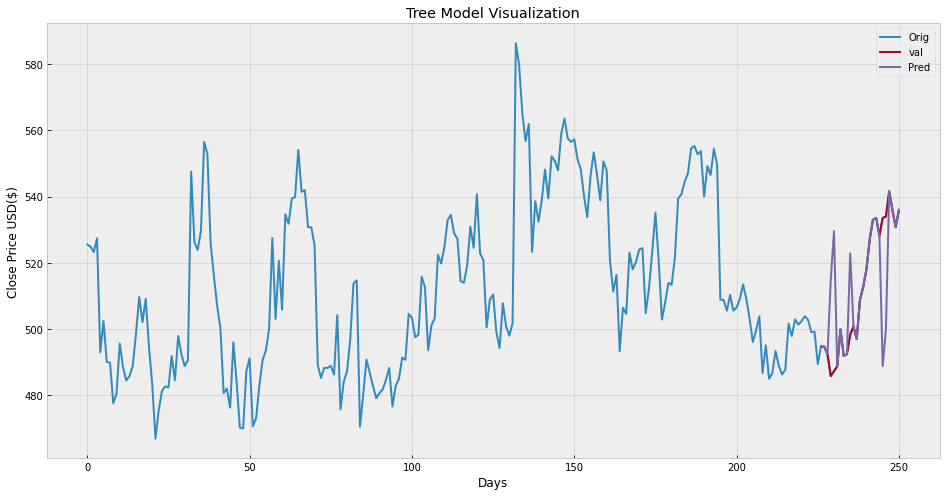

In [ ]:
#visualize the tree data prediction

predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Tree Model Visualization')
plt.xlabel('Days')
plt.ylabel('Close Price USD($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'val', 'Pred'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


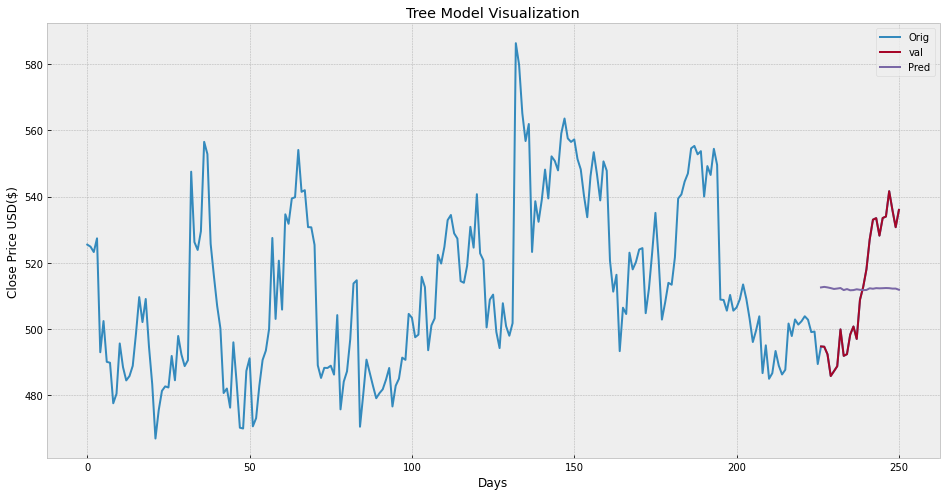

In [ ]:
#visualize the linear regression data prediction

predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Tree Model Visualization')
plt.xlabel('Days')
plt.ylabel('Close Price USD($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'val', 'Pred'])
plt.show()